In [4]:
#Modules
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\gawde\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gawde\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gawde\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gawde\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [15]:
# Square brackets create variables of data type list,
# round brackets create variables of data type generator,

# Data creation, since we do not have any data
Data = [[[(i + j)/100] for i in range(5)] for j in range(100)] #independent
Target = [((i + 5)/100) for i in range(100)] #dependent

In [16]:
Data_Vector, Target_Vector = np.array(Data, dtype = float), np.array(Target, dtype = float)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(Data_Vector, Target_Vector, test_size = 0.2, random_state = 4)
# random state is the seed for random number generator

In [19]:
# RNN model
model = Sequential()
model.add(LSTM((1), batch_input_shape = (None, 5, 1), return_sequences = True))
# for LSTM layers hyperparameters (hparam) are as follows:
# hparam 1: Output size, here it is 1
# hparam 2: Shape of i/p data has 3 factors : No of i/p, length of i/p seq, length of each vector
# hparam 3: return_sequences = True gives o/p after every node, False gives it after the last node
# params : factors changed by the model at every epoch
# hyperparams : factors which we hardcode / hard set, which do not change
model.add(LSTM((1), return_sequences = False))

In [9]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs = 1000, validation_data = (x_test, y_test))


Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.5630 - accuracy: 0.0000e+00 - val_loss: 0.4527 - val_accuracy: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 350us/step - loss: 0.5611 - accuracy: 0.0000e+00 - val_loss: 0.4509 - val_accuracy: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 350us/step - loss: 0.5593 - accuracy: 0.0000e+00 - val_loss: 0.4490 - val_accuracy: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 300us/step - loss: 0.5574 - accuracy: 0.0000e+00 - val_loss: 0.4471 - val_accuracy: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 287us/step - loss: 0.5555 - accuracy: 0.0000e+00 - val_loss: 0.4452 - val_accuracy: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 337us/step - loss: 0.5536 - accuracy: 0.0000e+00 - val_loss: 0.4433 - val_accuracy: 0.0000e+00
Epoch 7/1000
80/80 [=========================

80/80 [==============================] - 0s 375us/step - loss: 0.4024 - accuracy: 0.0000e+00 - val_loss: 0.2884 - val_accuracy: 0.0000e+00
Epoch 54/1000
80/80 [==============================] - 0s 388us/step - loss: 0.3979 - accuracy: 0.0000e+00 - val_loss: 0.2837 - val_accuracy: 0.0000e+00
Epoch 55/1000
80/80 [==============================] - 0s 412us/step - loss: 0.3932 - accuracy: 0.0000e+00 - val_loss: 0.2790 - val_accuracy: 0.0000e+00
Epoch 56/1000
80/80 [==============================] - 0s 350us/step - loss: 0.3890 - accuracy: 0.0000e+00 - val_loss: 0.2746 - val_accuracy: 0.0000e+00
Epoch 57/1000
80/80 [==============================] - 0s 350us/step - loss: 0.3841 - accuracy: 0.0000e+00 - val_loss: 0.2706 - val_accuracy: 0.0000e+00
Epoch 58/1000
80/80 [==============================] - 0s 337us/step - loss: 0.3794 - accuracy: 0.0000e+00 - val_loss: 0.2666 - val_accuracy: 0.0000e+00
Epoch 59/1000
80/80 [==============================] - 0s 300us/step - loss: 0.3746 - accuracy: 

Epoch 107/1000
80/80 [==============================] - 0s 325us/step - loss: 0.2304 - accuracy: 0.0000e+00 - val_loss: 0.2028 - val_accuracy: 0.0500
Epoch 108/1000
80/80 [==============================] - 0s 312us/step - loss: 0.2288 - accuracy: 0.0000e+00 - val_loss: 0.2030 - val_accuracy: 0.0500
Epoch 109/1000
80/80 [==============================] - 0s 350us/step - loss: 0.2276 - accuracy: 0.0000e+00 - val_loss: 0.2032 - val_accuracy: 0.0500
Epoch 110/1000
80/80 [==============================] - 0s 300us/step - loss: 0.2262 - accuracy: 0.0000e+00 - val_loss: 0.2032 - val_accuracy: 0.0500
Epoch 111/1000
80/80 [==============================] - 0s 337us/step - loss: 0.2250 - accuracy: 0.0000e+00 - val_loss: 0.2030 - val_accuracy: 0.0500
Epoch 112/1000
80/80 [==============================] - 0s 312us/step - loss: 0.2236 - accuracy: 0.0000e+00 - val_loss: 0.2026 - val_accuracy: 0.0500
Epoch 113/1000
80/80 [==============================] - 0s 325us/step - loss: 0.2224 - accuracy: 0.0

80/80 [==============================] - 0s 300us/step - loss: 0.1336 - accuracy: 0.0000e+00 - val_loss: 0.1148 - val_accuracy: 0.0500
Epoch 162/1000
80/80 [==============================] - 0s 275us/step - loss: 0.1310 - accuracy: 0.0000e+00 - val_loss: 0.1117 - val_accuracy: 0.0500
Epoch 163/1000
80/80 [==============================] - 0s 350us/step - loss: 0.1283 - accuracy: 0.0000e+00 - val_loss: 0.1085 - val_accuracy: 0.0500
Epoch 164/1000
80/80 [==============================] - 0s 337us/step - loss: 0.1255 - accuracy: 0.0000e+00 - val_loss: 0.1053 - val_accuracy: 0.0500
Epoch 165/1000
80/80 [==============================] - 0s 338us/step - loss: 0.1227 - accuracy: 0.0000e+00 - val_loss: 0.1018 - val_accuracy: 0.0500
Epoch 166/1000
80/80 [==============================] - 0s 337us/step - loss: 0.1197 - accuracy: 0.0000e+00 - val_loss: 0.0986 - val_accuracy: 0.0500
Epoch 167/1000
80/80 [==============================] - 0s 338us/step - loss: 0.1168 - accuracy: 0.0000e+00 - val_l

Epoch 216/1000
80/80 [==============================] - 0s 375us/step - loss: 0.0528 - accuracy: 0.0000e+00 - val_loss: 0.0499 - val_accuracy: 0.0500
Epoch 217/1000
80/80 [==============================] - 0s 375us/step - loss: 0.0525 - accuracy: 0.0000e+00 - val_loss: 0.0497 - val_accuracy: 0.0500
Epoch 218/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0522 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0500
Epoch 219/1000
80/80 [==============================] - 0s 275us/step - loss: 0.0519 - accuracy: 0.0000e+00 - val_loss: 0.0493 - val_accuracy: 0.0500
Epoch 220/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0516 - accuracy: 0.0000e+00 - val_loss: 0.0491 - val_accuracy: 0.0500
Epoch 221/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0513 - accuracy: 0.0000e+00 - val_loss: 0.0488 - val_accuracy: 0.0500
Epoch 222/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0510 - accuracy: 0.0

80/80 [==============================] - 0s 375us/step - loss: 0.0418 - accuracy: 0.0000e+00 - val_loss: 0.0417 - val_accuracy: 0.0500
Epoch 271/1000
80/80 [==============================] - 0s 300us/step - loss: 0.0417 - accuracy: 0.0000e+00 - val_loss: 0.0417 - val_accuracy: 0.0500
Epoch 272/1000
80/80 [==============================] - 0s 387us/step - loss: 0.0415 - accuracy: 0.0000e+00 - val_loss: 0.0418 - val_accuracy: 0.0500
Epoch 273/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0415 - accuracy: 0.0000e+00 - val_loss: 0.0417 - val_accuracy: 0.0500
Epoch 274/1000
80/80 [==============================] - 0s 515us/step - loss: 0.0413 - accuracy: 0.0000e+00 - val_loss: 0.0416 - val_accuracy: 0.0500
Epoch 275/1000
80/80 [==============================] - 0s 375us/step - loss: 0.0412 - accuracy: 0.0000e+00 - val_loss: 0.0415 - val_accuracy: 0.0500
Epoch 276/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0411 - accuracy: 0.0000e+00 - val_l

Epoch 325/1000
80/80 [==============================] - 0s 313us/step - loss: 0.0365 - accuracy: 0.0000e+00 - val_loss: 0.0370 - val_accuracy: 0.0500
Epoch 326/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.0371 - val_accuracy: 0.0500
Epoch 327/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0363 - accuracy: 0.0000e+00 - val_loss: 0.0369 - val_accuracy: 0.0500
Epoch 328/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0362 - accuracy: 0.0000e+00 - val_loss: 0.0366 - val_accuracy: 0.0500
Epoch 329/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0362 - accuracy: 0.0000e+00 - val_loss: 0.0365 - val_accuracy: 0.0500
Epoch 330/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0361 - accuracy: 0.0000e+00 - val_loss: 0.0365 - val_accuracy: 0.0500
Epoch 331/1000
80/80 [==============================] - 0s 338us/step - loss: 0.0360 - accuracy: 0.0

80/80 [==============================] - 0s 275us/step - loss: 0.0332 - accuracy: 0.0000e+00 - val_loss: 0.0341 - val_accuracy: 0.0500
Epoch 380/1000
80/80 [==============================] - 0s 275us/step - loss: 0.0331 - accuracy: 0.0000e+00 - val_loss: 0.0345 - val_accuracy: 0.0500
Epoch 381/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0330 - accuracy: 0.0000e+00 - val_loss: 0.0347 - val_accuracy: 0.0500
Epoch 382/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0331 - accuracy: 0.0000e+00 - val_loss: 0.0350 - val_accuracy: 0.0500
Epoch 383/1000
80/80 [==============================] - 0s 337us/step - loss: 0.0331 - accuracy: 0.0000e+00 - val_loss: 0.0349 - val_accuracy: 0.0500
Epoch 384/1000
80/80 [==============================] - 0s 300us/step - loss: 0.0330 - accuracy: 0.0000e+00 - val_loss: 0.0344 - val_accuracy: 0.0500
Epoch 385/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0329 - accuracy: 0.0000e+00 - val_l

Epoch 434/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0309 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0500
Epoch 435/1000
80/80 [==============================] - 0s 337us/step - loss: 0.0309 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0500
Epoch 436/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0309 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0500
Epoch 437/1000
80/80 [==============================] - 0s 275us/step - loss: 0.0308 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0500
Epoch 438/1000
80/80 [==============================] - 0s 337us/step - loss: 0.0307 - accuracy: 0.0000e+00 - val_loss: 0.0325 - val_accuracy: 0.0500
Epoch 439/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0307 - accuracy: 0.0000e+00 - val_loss: 0.0325 - val_accuracy: 0.0500
Epoch 440/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0307 - accuracy: 0.0

80/80 [==============================] - 0s 325us/step - loss: 0.0294 - accuracy: 0.0000e+00 - val_loss: 0.0308 - val_accuracy: 0.0500
Epoch 489/1000
80/80 [==============================] - 0s 363us/step - loss: 0.0293 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0500
Epoch 490/1000
80/80 [==============================] - 0s 375us/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0313 - val_accuracy: 0.0500
Epoch 491/1000
80/80 [==============================] - 0s 362us/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0314 - val_accuracy: 0.0500
Epoch 492/1000
80/80 [==============================] - 0s 362us/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0313 - val_accuracy: 0.0500
Epoch 493/1000
80/80 [==============================] - 0s 412us/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0309 - val_accuracy: 0.0500
Epoch 494/1000
80/80 [==============================] - 0s 362us/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_l

Epoch 543/1000
80/80 [==============================] - 0s 400us/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0305 - val_accuracy: 0.0500
Epoch 544/1000
80/80 [==============================] - 0s 387us/step - loss: 0.0281 - accuracy: 0.0000e+00 - val_loss: 0.0302 - val_accuracy: 0.0500
Epoch 545/1000
80/80 [==============================] - 0s 375us/step - loss: 0.0280 - accuracy: 0.0000e+00 - val_loss: 0.0301 - val_accuracy: 0.0500
Epoch 546/1000
80/80 [==============================] - 0s 338us/step - loss: 0.0280 - accuracy: 0.0000e+00 - val_loss: 0.0303 - val_accuracy: 0.0500
Epoch 547/1000
80/80 [==============================] - 0s 337us/step - loss: 0.0280 - accuracy: 0.0000e+00 - val_loss: 0.0305 - val_accuracy: 0.0500
Epoch 548/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0309 - val_accuracy: 0.0500
Epoch 549/1000
80/80 [==============================] - 0s 287us/step - loss: 0.0281 - accuracy: 0.0

80/80 [==============================] - 0s 375us/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0293 - val_accuracy: 0.0500
Epoch 598/1000
80/80 [==============================] - 0s 362us/step - loss: 0.0270 - accuracy: 0.0000e+00 - val_loss: 0.0291 - val_accuracy: 0.0500
Epoch 599/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0500
Epoch 600/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0273 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0500
Epoch 601/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0293 - val_accuracy: 0.0500
Epoch 602/1000
80/80 [==============================] - 0s 338us/step - loss: 0.0270 - accuracy: 0.0000e+00 - val_loss: 0.0297 - val_accuracy: 0.0500
Epoch 603/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0272 - accuracy: 0.0000e+00 - val_l

80/80 [==============================] - 0s 312us/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0500
Epoch 652/1000
80/80 [==============================] - 0s 287us/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 653/1000
80/80 [==============================] - 0s 413us/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0283 - val_accuracy: 0.0500
Epoch 654/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0283 - val_accuracy: 0.0500
Epoch 655/1000
80/80 [==============================] - 0s 388us/step - loss: 0.0262 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 656/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0262 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0500
Epoch 657/1000
80/80 [==============================] - 0s 362us/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_l

80/80 [==============================] - 0s 300us/step - loss: 0.0256 - accuracy: 0.0000e+00 - val_loss: 0.0282 - val_accuracy: 0.0500
Epoch 706/1000
80/80 [==============================] - 0s 337us/step - loss: 0.0256 - accuracy: 0.0000e+00 - val_loss: 0.0281 - val_accuracy: 0.0500
Epoch 707/1000
80/80 [==============================] - 0s 438us/step - loss: 0.0256 - accuracy: 0.0000e+00 - val_loss: 0.0278 - val_accuracy: 0.0500
Epoch 708/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0256 - accuracy: 0.0000e+00 - val_loss: 0.0275 - val_accuracy: 0.0500
Epoch 709/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0257 - accuracy: 0.0000e+00 - val_loss: 0.0275 - val_accuracy: 0.0500
Epoch 710/1000
80/80 [==============================] - 0s 362us/step - loss: 0.0256 - accuracy: 0.0000e+00 - val_loss: 0.0280 - val_accuracy: 0.0500
Epoch 711/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0255 - accuracy: 0.0000e+00 - val_l

Epoch 760/1000
80/80 [==============================] - 0s 288us/step - loss: 0.0251 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0500
Epoch 761/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0500
Epoch 762/1000
80/80 [==============================] - 0s 287us/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0270 - val_accuracy: 0.0500
Epoch 763/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0500
Epoch 764/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0500
Epoch 765/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0500
Epoch 766/1000
80/80 [==============================] - 0s 313us/step - loss: 0.0249 - accuracy: 0.0

Epoch 814/1000
80/80 [==============================] - 0s 287us/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0270 - val_accuracy: 0.0500
Epoch 815/1000
80/80 [==============================] - 0s 250us/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0270 - val_accuracy: 0.0500
Epoch 816/1000
80/80 [==============================] - 0s 275us/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0500
Epoch 817/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0284 - val_accuracy: 0.0500
Epoch 818/1000
80/80 [==============================] - 0s 287us/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0281 - val_accuracy: 0.0500
Epoch 819/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0500
Epoch 820/1000
80/80 [==============================] - 0s 400us/step - loss: 0.0245 - accuracy: 0.0

80/80 [==============================] - 0s 377us/step - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: 0.0272 - val_accuracy: 0.0500
Epoch 869/1000
80/80 [==============================] - 0s 422us/step - loss: 0.0241 - accuracy: 0.0000e+00 - val_loss: 0.0281 - val_accuracy: 0.0500
Epoch 870/1000
80/80 [==============================] - 0s 350us/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0279 - val_accuracy: 0.0500
Epoch 871/1000
80/80 [==============================] - 0s 210us/step - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: 0.0266 - val_accuracy: 0.0500
Epoch 872/1000
80/80 [==============================] - 0s 296us/step - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: 0.0259 - val_accuracy: 0.0500
Epoch 873/1000
80/80 [==============================] - 0s 398us/step - loss: 0.0241 - accuracy: 0.0000e+00 - val_loss: 0.0258 - val_accuracy: 0.0500
Epoch 874/1000
80/80 [==============================] - 0s 263us/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_l

Epoch 923/1000
80/80 [==============================] - 0s 250us/step - loss: 0.0237 - accuracy: 0.0000e+00 - val_loss: 0.0258 - val_accuracy: 0.0500
Epoch 924/1000
80/80 [==============================] - 0s 263us/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0261 - val_accuracy: 0.0500
Epoch 925/1000
80/80 [==============================] - 0s 237us/step - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 926/1000
80/80 [==============================] - 0s 262us/step - loss: 0.0237 - accuracy: 0.0000e+00 - val_loss: 0.0270 - val_accuracy: 0.0500
Epoch 927/1000
80/80 [==============================] - 0s 262us/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0500
Epoch 928/1000
80/80 [==============================] - 0s 250us/step - loss: 0.0236 - accuracy: 0.0000e+00 - val_loss: 0.0258 - val_accuracy: 0.0500
Epoch 929/1000
80/80 [==============================] - 0s 262us/step - loss: 0.0236 - accuracy: 0.0

80/80 [==============================] - 0s 325us/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0255 - val_accuracy: 0.0500
Epoch 978/1000
80/80 [==============================] - 0s 300us/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0256 - val_accuracy: 0.0500
Epoch 979/1000
80/80 [==============================] - 0s 287us/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0256 - val_accuracy: 0.0500
Epoch 980/1000
80/80 [==============================] - 0s 300us/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 0.0255 - val_accuracy: 0.0500
Epoch 981/1000
80/80 [==============================] - 0s 262us/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0256 - val_accuracy: 0.0500
Epoch 982/1000
80/80 [==============================] - 0s 275us/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0261 - val_accuracy: 0.0500
Epoch 983/1000
80/80 [==============================] - 0s 177us/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_l

In [20]:
results = model.predict(x_test)

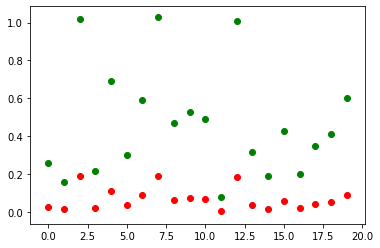

In [21]:
plt.scatter(range(20), results, c = 'r') #experimental
plt.scatter(range(20), y_test, c = 'g') #empirical
plt.show()
# un normalized data led to underfitting due to high gradients, to fit appropriately I have normalized the data by dividing by 100

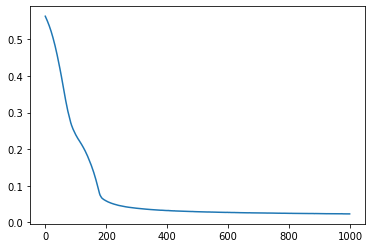

In [14]:
plt.plot(history.history['loss'])
plt.show()